In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix

In [12]:
data = pd.read_csv("./anti-malware .csv")
data.columns = range(len(data.columns))

data

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,0,10,0,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,5,2,2,96,2,15,3,116,2,1,...,0,0,0,0,0,0,0,0,0,1
3,9,13,5,662,37,0,0,405,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,2,2,94,3,17,4,116,2,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,204,41,109,2680,77,102,24,148,0,12,...,0,0,0,0,0,0,0,0,0,1
11257,197,39,107,2525,73,135,24,148,0,12,...,0,0,0,0,0,0,0,0,0,1
11258,198,39,109,2534,72,162,22,188,0,11,...,0,0,0,0,0,0,0,0,0,1
11259,13,0,3,481,29,0,101,171,10,5,...,0,0,0,0,0,0,0,0,0,1


## Preprocessing

In [13]:
print("before: ", data.isna().sum())

before:  0      0
1      0
2      0
3      0
4      0
      ..
307    0
308    0
309    0
310    0
311    0
Length: 312, dtype: int64


## Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler


min_max_scaler = MinMaxScaler()
x = data.values
x_scaled = min_max_scaler.fit_transform(x)

normalized = pd.DataFrame(x_scaled, index=data.index)
data = normalized

data

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000004,0.000400,0.000000,0.000019,0.000000,0.000021,0.000019,0.000000,0.000000,0.000125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000011,0.000400,0.000065,0.000184,0.000029,0.000078,0.000057,0.004241,0.006410,0.000125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000019,0.002601,0.000163,0.001270,0.000534,0.000000,0.000000,0.014809,0.000000,0.000125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000006,0.000400,0.000065,0.000180,0.000043,0.000089,0.000076,0.004241,0.006410,0.000125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,0.000432,0.008202,0.003564,0.005142,0.001112,0.000534,0.000455,0.005412,0.000000,0.001494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11257,0.000417,0.007802,0.003499,0.004845,0.001054,0.000706,0.000455,0.005412,0.000000,0.001494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11258,0.000419,0.007802,0.003564,0.004862,0.001040,0.000848,0.000417,0.006874,0.000000,0.001370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11259,0.000028,0.000000,0.000098,0.000923,0.000419,0.000000,0.001914,0.006253,0.032051,0.000623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train/Test

In [15]:
Y = np.array(data.pop(311))
X = np.array(data)
print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_test.shape, X_train.shape)

(11261, 311) (11261,)
(2253, 311) (9008, 311)


## 1) Logistic Regression Model

In [27]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

score = lr.score(X_test, Y_test)
print(score)

0.8051486906347093


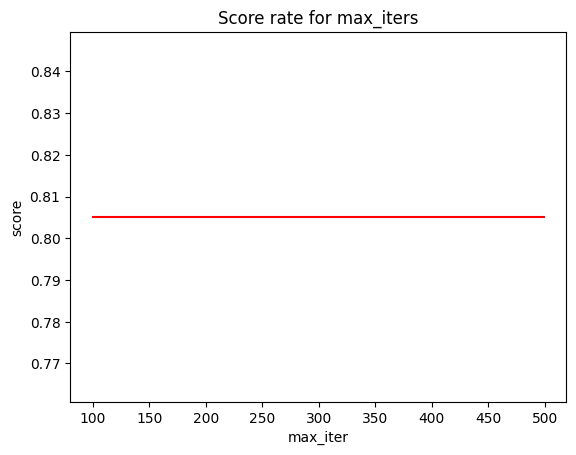

100


In [22]:
list_of_scores = []

for index in range(100, 500):
    _lr = LogisticRegression(max_iter=index)
    _lr.fit(X_train, Y_train)
    score = _lr.score(X_test, Y_test)
    list_of_scores.append(score)
    
plt.plot(list(range(100, 500)), list_of_scores, color="red")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.title("Score rate for max_iters")
plt.show()

scores = np.array(list_of_scores)
index_max = np.argmax(scores) + 100
print(index_max)

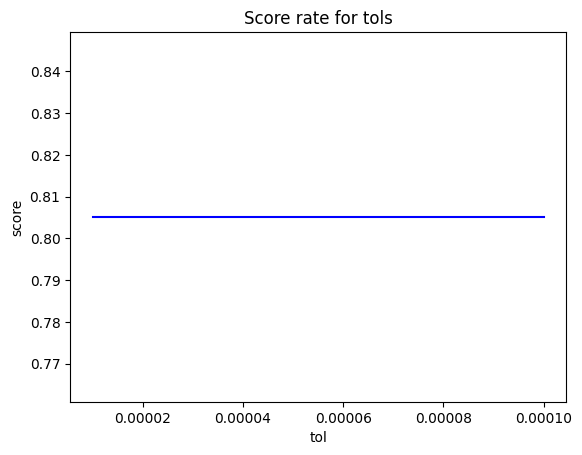

In [25]:
loop_range = np.linspace(0.00001, 0.0001, 1000)  

list_of_scores = []

for index in loop_range:  
    _lr = LogisticRegression(tol=index)
    _lr.fit(X_train, Y_train)
    score = _lr.score(X_test, Y_test)
    list_of_scores.append(score)
    
plt.plot(list(np.linspace(0.00001, 0.0001, 1000)), list_of_scores, color="blue")
plt.xlabel("tol")
plt.ylabel("score")
plt.title("Score rate for tols")
plt.show()

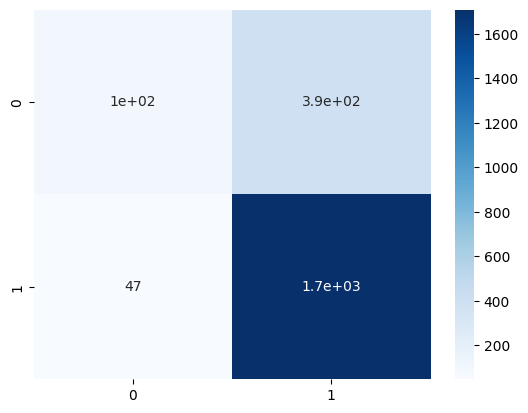

In [29]:
cm = confusion_matrix(Y_test, lr.predict(X_test))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

## 2) Gaussian Naive Bayes Model

In [31]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

score = gnb.score(X_test, Y_test)
print(score)

0.6600088770528184


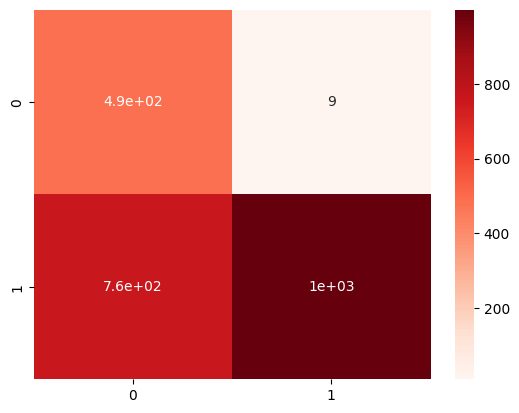

In [32]:
cm = confusion_matrix(Y_test, gnb.predict(X_test))
sns.heatmap(cm, annot=True, cmap="Reds")
plt.show()